<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine2/blob/main/WOMAC_Total_Regression_Version300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
import numpy as np
import pandas as pd
import smogn
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")
d=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")

dataset = smogn.smoter(
    
    data = d, 
    y = "WOMAC_total"
)

r_index: 100%|##########| 2/2 [00:00<00:00,  3.58it/s]


In [84]:
dataset.head(10)

,Patient ID,Data Type,Bone-Attribution,WOMAC_Pain,WOMAC_Pain Grade,WOMAC_Stiffness,WOMAC_Stiffness Grade,WOMAC_Physical function,WOMAC_MHhysical function Grade,WOMAC_total,...,TA-G-100,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13490,Testing,O,12,Moderate,2,Mild,51,Severe,66,...,83.041549,21.571948,194.111278,19.815949,120.175482,83.811155,115.163061,5.449269,0.407623,5.583979
1,14062,Testing,O,9,Moderate,5,Mild,49,Severe,65,...,41.988757,29.117238,302.433563,27.930986,72.803860,339.944796,85.275131,2.442466,1.126511,2.895745
2,14076,Testing,O,10,Moderate,6,Mild,50,Severe,65,...,43.801702,138.523414,159.536776,121.112969,84.398311,75.160194,112.700793,0.675996,0.470629,0.929621
3,14438,Testing,O,15,Moderate,5,Mild,46,Severe,66,...,84.016778,99.330676,74.536944,89.802849,111.105147,53.979788,169.605008,1.086040,0.733378,1.959402
4,14461,Testing,O,14,Moderate,5,Mild,46,Severe,67,...,869.375154,245.357463,74.299366,478.724335,323.124554,15.075164,809.027849,1.366886,0.203264,1.718655
5,13260,Testing,O,9,Moderate,6,Mild,52,Severe,67,...,99.933796,93.904277,143.256352,96.919363,224.693687,25.403154,226.900675,2.331975,0.197431,2.225354
6,13351,Testing,O,14,Moderate,6,Mild,49,Severe,69,...,105.645522,125.441263,133.057425,126.549557,113.012959,110.326039,127.983083,0.873614,0.844438,1.002228
7,13362,Testing,O,14,Moderate,5,Mild,50,Severe,70,...,54.021744,289.842210,106.425229,132.959614,158.540256,75.536832,186.173192,0.531214,0.723604,1.347554
8,13509,Testing,O,14,Moderate,5,Mild,49,Severe,69,...,200.368638,80.139147,64.852872,159.528117,110.953341,25.679637,327.998270,1.384003,0.354424,2.059278
9,14136,Testing,O,12,Moderate,5,Mild,52,Severe,70,...,260.666561,223.975790,101.038761,256.489641,281.173694,36.652573,405.939444,1.220897,0.356603,1.609719


In [85]:
dataset.shape

(151, 812)

In [86]:
X = dataset.iloc[:,17:]
y = dataset.iloc[:, 9]

In [25]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [87]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

Features [21 22 23 24] are constant.
invalid value encountered in true_divide


In [88]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [89]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [90]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 20


In [91]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

              Specs      Score
784         TA-G-99  13.193986
777         TA-G-92  13.126674
785        TA-G-100  13.097087
779         TA-G-94  13.012692
776         TA-G-91  12.739091
778         TA-G-93  12.718506
783         TA-G-98  12.200196
780         TA-G-95  12.170597
782         TA-G-97  11.634880
781         TA-G-96  11.392590
775         TA-G-90  10.754171
774         TA-G-89   8.264121
791  Swing_CCI_TA-G   7.406180
773         TA-G-88   6.721707
772         TA-G-87   5.847914
685          TA-G-0   5.772313
771         TA-G-86   5.224324
686          TA-G-1   5.192751
759         TA-G-74   4.875783
760         TA-G-75   4.829657


In [92]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [93]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 9]

In [94]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

In [95]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


#Taining Ploting and Result

In [96]:
y_pred_train = lin_reg.predict(X_train)

print(y_pred.shape)
from sklearn.metrics import r2_score,mean_squared_error
print("Training r2: ",r2_score(y_train,y_pred_train))


r_sq = lin_reg.score(X_new, y_new)
print("Training r_sq: ",r_sq)





(31,)
Training r2:  0.3025231787675433
Training r_sq:  -0.19783267222689838


In [97]:
r_sq_train = lin_reg.score(X_train, y_pred_train)
print(r_sq_train)

1.0


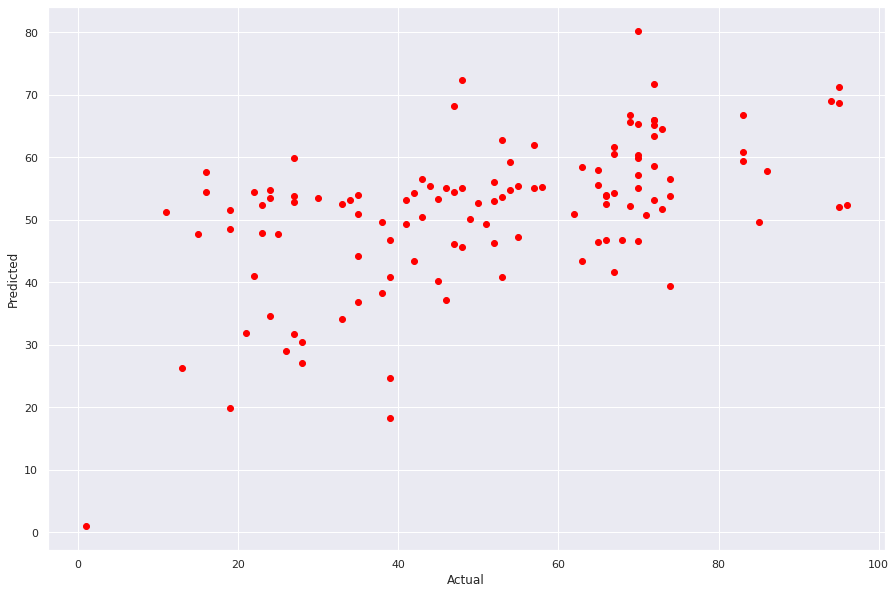

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred_train, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [99]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_train,
        "Predicted Value":y_pred_train,
        "Difference":y_train-y_pred_train
    }
)

pred_y_df

,Actual Value,Predicted Value,Difference
0,66,53.778611,12.221389
1,65,55.510719,9.489281
2,65,46.417217,18.582783
3,66,46.811008,19.188992
4,67,61.658227,5.341773
...,...,...,...
133,43,56.520172,-13.520172
134,44,55.348329,-11.348329
137,48,45.731387,2.268613
140,53,40.877567,12.122433


In [100]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train))



Mean squared error: 322.43
Coefficient of determination: 0.30


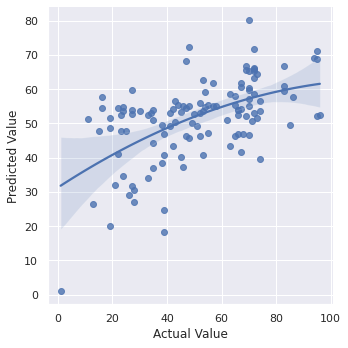

In [101]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)



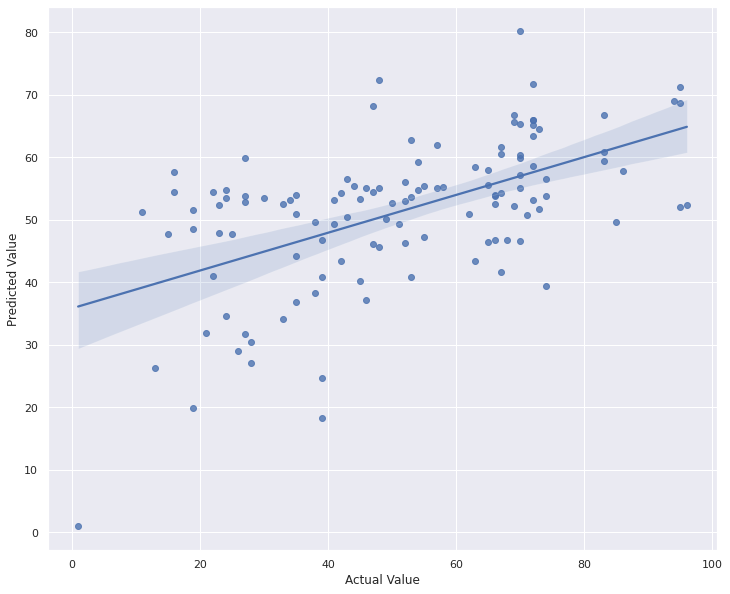

In [102]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);




#Testing Ploting and Result

In [103]:
y_pred_test = lin_reg.predict(X_test)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_test))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -2.723820456662202
R_sq:  -0.19783267222689838


In [104]:
r_sq_test = lin_reg.score(X_test, y_pred_test)
print(r_sq_test)

1.0


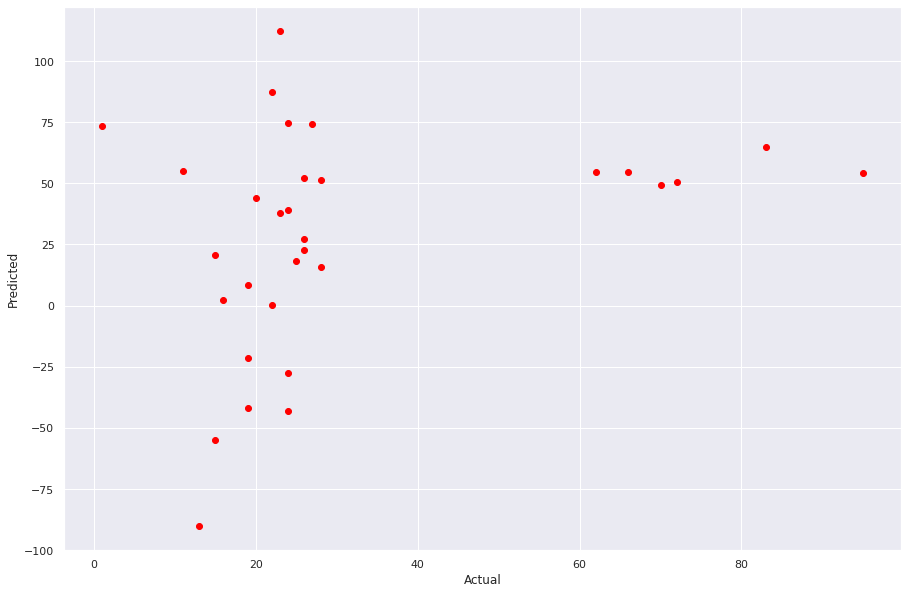

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [106]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_test,
        "Predicted Value":y_pred_test,
        "Difference":y_test-y_pred_test
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
144,62,54.577433,7.422567
145,66,54.611353,11.388647
146,70,49.352974,20.647026
147,72,50.438007,21.561993
148,83,65.047453,17.952547
149,95,54.188469,40.811531
0,1,73.490050,-72.490050
1,11,55.124004,-44.124004
2,13,-89.952585,102.952585
3,15,20.523501,-5.523501


In [107]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))


Mean squared error: 1889.71
Coefficient of determination: -2.72


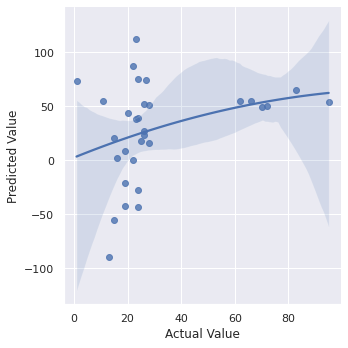

In [108]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

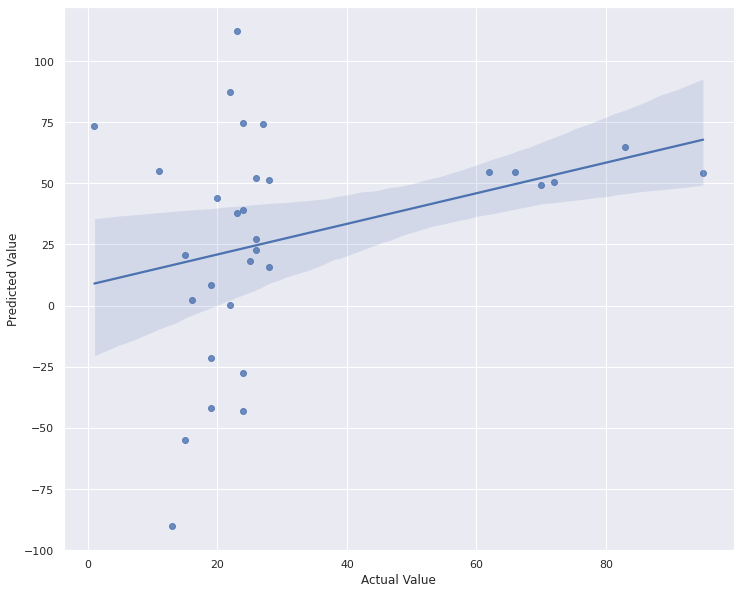

In [109]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

#Over All dataset Ploting and Results

In [110]:
y_pred_new = lin_reg.predict(X_new)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_new,y_pred_new))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -0.19783267222689838
R_sq:  -0.19783267222689838


In [111]:
r_sq_test = lin_reg.score(X_new, y_pred_new)
print(r_sq_test)

1.0


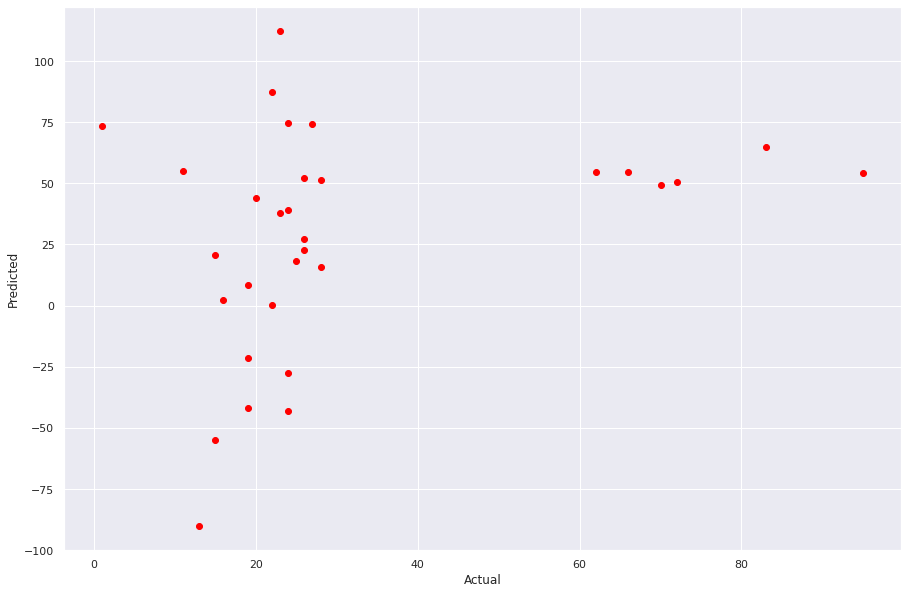

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [113]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_new,
        "Predicted Value":y_pred_new,
        "Difference":y_new-y_pred_new
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
0,66,53.778611,12.221389
1,65,55.510719,9.489281
2,65,46.417217,18.582783
3,66,46.811008,19.188992
4,67,61.658227,5.341773
...,...,...,...
20,27,74.097438,-47.097438
21,26,27.314392,-1.314392
22,26,22.907700,3.092300
23,28,51.334793,-23.334793


In [114]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_new, y_pred_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_new, y_pred_new))


Mean squared error: 644.19
Coefficient of determination: -0.20


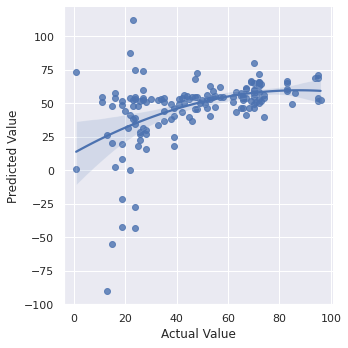

In [115]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

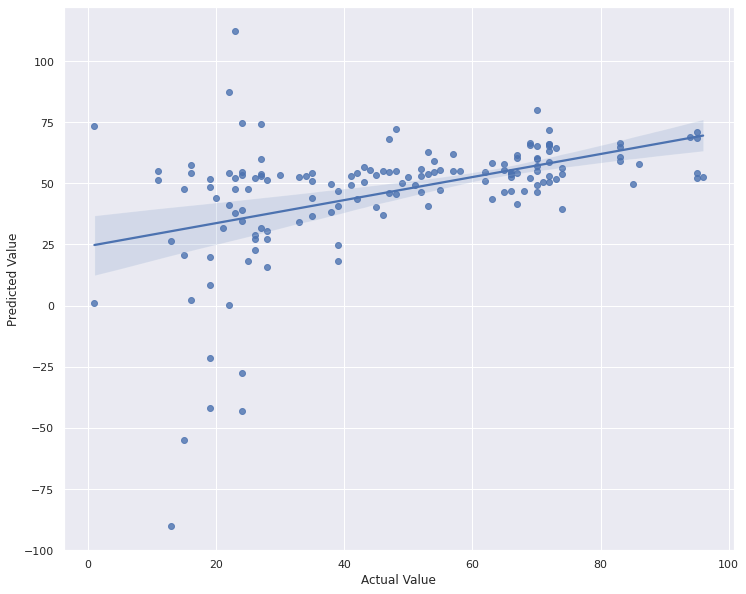

In [116]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

#Support Vector Regression (SVR) using linear and non-linear kernels

**SHAP**

In [117]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


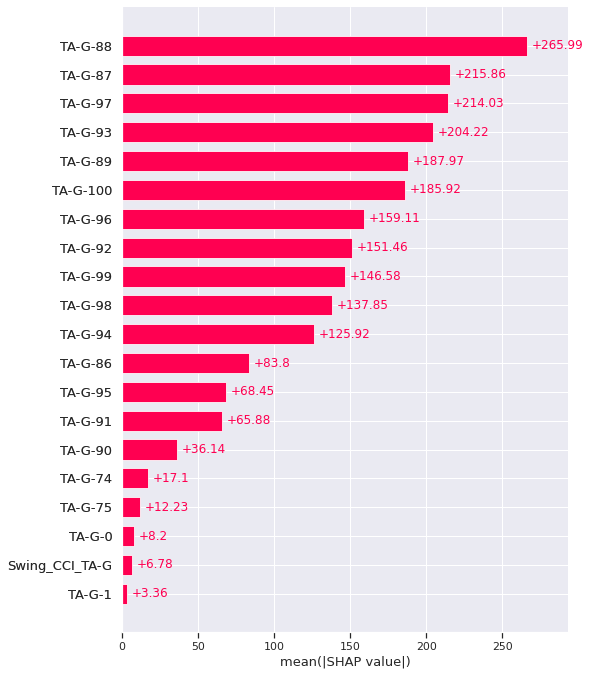

In [118]:
import pandas as pd
import shap
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer (X_train)
shap.plots.bar(shap_values,max_display=20)